In [1]:
# Modulos necesarios 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime as datetime 
import datetime
import os
from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_ALIGN_PARAGRAPH
import zipfile, requests, io
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
#import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU


In [2]:
#string = datetime.datetime.today().strftime('%y%m%d')
string = '200629' # RECUERDA PONER EL OTRO PARA ACTUALIZAR
path = 'C:/Users/Emilio EG/Documents/ITAM/CIC19/'
path2 = path+string+'/'
path3 = path+'datos/'
#os.mkdir(path2) # Este comando crea el folder en el desktop con la fecha del día 

In [ ]:
zp = requests.get('http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip')
zf = zipfile.ZipFile(io.BytesIO(zp.content)) 
zf.extractall(path2)

In [4]:
#hoy=datetime.datetime.today()
hoy=datetime.datetime.strptime('2020-29-06','%Y-%d-%m')
corte = hoy - datetime.timedelta(days=12)

base_covid = pd.read_csv(path2+string+'COVID19MEXICO.csv',encoding='latin1') 

base_covid.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-06-29,16169f,2,3,27,2,27,27,13,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
1,2020-06-29,1009bf,2,4,14,2,14,14,39,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-06-29,167386,2,4,2,1,15,2,2,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-06-29,0b5948,2,4,9,2,9,9,12,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-06-29,0d01b5,2,4,25,1,25,25,6,2,...,1,2,2,2,99,1,99,MÃ©xico,99,2


In [4]:
base_covid.loc[base_covid['FECHA_DEF'] == '9999-99-99', 'FECHA_DEF'] = pd.NaT #9999-99-99 pasa a ser NaT
base_covid['FECHA_DEF']=pd.to_datetime(base_covid['FECHA_DEF']) #los valores de la columna pasan a ser datetime
base_covid['FECHA_INGRESO']=pd.to_datetime(base_covid['FECHA_INGRESO']) #los valores de la columna pasan a ser datetime
base_def=base_covid.dropna() #eliminamos los NA, NaN y NaT
base_def['FECHA_INGRESO']

4        2020-04-13
5        2020-04-16
24       2020-05-15
36       2020-04-27
41       2020-04-26
            ...    
566548   2020-05-03
566552   2020-06-12
566553   2020-06-04
566578   2020-06-05
566591   2020-05-08
Name: FECHA_INGRESO, Length: 36176, dtype: datetime64[ns]

In [5]:
#MUERTES POR COVID
base_m_cov=base_def[base_def['RESULTADO']==1] #muertos por covid
base_m_cov.loc[base_m_cov['FECHA_SINTOMAS'] == '9999-99-99', 'FECHA_SINTOMAS'] = pd.NaT
base_m_cov['FECHA_SINTOMAS']=pd.to_datetime(base_m_cov['FECHA_SINTOMAS'])

base_m_cov=base_m_cov.dropna()

cuenta_cov=base_m_cov.pivot_table(index=['FECHA_DEF'], aggfunc='size') #contamos los muertos por covid por dia
cuenta_cov=pd.DataFrame(cuenta_cov) #lo anterior ahora es df
idx=pd.date_range(cuenta_cov.index[0],hoy) #crea un rango de fechas, desde el primero con defuncion hasta hoy
cuenta_cov=cuenta_cov.reindex(idx, fill_value=0) #reindexamos el df para tener todas las fechas, las que no estaban ahora valen 0
dfs_cov=cuenta_cov.cumsum() #suma acumulada por dia
dfs_cov

C:\Users\Emilio EG\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,0
2020-03-18,2
2020-03-19,2
2020-03-20,3
2020-03-21,3
2020-03-22,4
...,...
2020-06-25,26654
2020-06-26,26853
2020-06-27,27011
2020-06-28,27113


In [6]:
#RESULTADO POSITIVO
base_m_prueba=base_covid[base_covid['RESULTADO']==1] #casos positivos de covid
base_m_prueba['FECHA_SINTOMAS']=pd.to_datetime(base_m_prueba['FECHA_SINTOMAS'])



cuenta_todo=base_m_prueba.pivot_table(index=['FECHA_SINTOMAS'], aggfunc='size') #contamos las muertes por día
cuenta_todo=pd.DataFrame(cuenta_todo) #lo anterior ahora es df
idx=pd.date_range(cuenta_todo.index[0],hoy) #crea un rango de fechas, desde el primero con defuncion hasta hoy
cuenta_todo=cuenta_todo.reindex(idx, fill_value=0) #reindexa para tener todas las fechas, las que faltaban valen 0
dfs_todo=cuenta_todo.cumsum() #suma acumulada por dia
dfs_todo

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0
2020-01-13,1
2020-01-14,2
2020-01-15,2
2020-01-16,2
2020-01-17,3
...,...
2020-06-25,220468
2020-06-26,220618
2020-06-27,220655
2020-06-28,220657


In [7]:
let=dfs_cov/dfs_todo #letalidad = muertos del total que presentaron sintomas cierto dia, contados por dia de sintoma, no de muerte
let_avg= let.iloc[:,0].rolling(window=7).mean()*100 #promedio movil 7 dias

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=MO, interval=2))
plt.plot(let_avg)
plt.title('Tasa de letalidad acumulada: NACIONAL')
plt.legend(['Media móvil 7 días'])
#plt.xlabel('Fecha')
plt.ylabel('Tasa en porcentaje (%)')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,np.min(let_avg),'En proceso de reporte',fontsize=10,rotation=90)
plt.gcf().autofmt_xdate()
plt.savefig(path2+'letalidad.png', bbox_inches='tight')
plt.clf()

C:\Users\Emilio EG\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

## AQUÍ TERMINA EL CÁLCULO DE LETALIDAD

In [8]:
let_avg.describe()

count    98.000000
mean      8.665948
std       3.787084
min       0.250911
25%       6.237684
50%      10.898560
75%      11.523475
max      12.136943
Name: 0, dtype: float64

In [9]:
base_positivo=base_covid[base_covid['RESULTADO']==1] #casos positivos de covid
positivo=base_positivo.pivot_table(index=['FECHA_INGRESO'], aggfunc='size') #contamos casos positivos por dia
positivo=pd.DataFrame(positivo)
idx=pd.date_range(positivo.index[0],hoy)
positivo=positivo.reindex(idx, fill_value=0)
positivo

,0
2020-01-13,1
2020-01-14,1
2020-01-15,0
2020-01-16,0
2020-01-17,0
...,...
2020-06-25,2527
2020-06-26,1382
2020-06-27,376
2020-06-28,56


In [10]:
base_prueba=base_covid[base_covid['RESULTADO']!=3] #casos con prueba completa 1 y 2
prueba=base_prueba.pivot_table(index=['FECHA_INGRESO'], aggfunc='size') #contamos los casos por dia
prueba=pd.DataFrame(prueba)
prueba

,0
FECHA_INGRESO,
2020-01-01,5
2020-01-02,16
2020-01-03,18
2020-01-04,6
2020-01-05,14
...,...
2020-06-25,5460
2020-06-26,3081
2020-06-27,833


In [11]:
percent=positivo/prueba #porcentaje de casos positivos por dia
percent=pd.DataFrame(percent) #lo anterior como df
idx=pd.date_range(percent.index[0],hoy) #crea un rango de fechas, desde el primero con casos hasta hoy
percent=percent.reindex(idx, fill_value=0) #reindexa para tener todas las fechas, las que faltaban valen 0
per_avg= percent.iloc[:,0].rolling(window=7).mean()*100 #media movil de 7 dias

per_avg.plot()
plt.title('Pruebas positivas por día:\n NACIONAL')
plt.legend(['Media móvil 7 días'])
#plt.xlabel('Fecha')
plt.ylabel('Porcentaje (%)')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,np.min(per_avg),'En proceso de reporte',fontsize=10,rotation=90)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%d-%b'))
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=2))
plt.gcf().autofmt_xdate()
plt.savefig(path2+'pruebas_pct.png', bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [12]:
per_avg.describe()

count    163.000000
mean      25.429389
std       20.128621
min        0.000000
25%        1.563621
50%       23.822306
75%       46.581094
max       55.152815
Name: 0, dtype: float64

In [13]:
#Casos negativos, resultado 2
base_neg=base_covid[base_covid['RESULTADO']==2] #casos con prueba 2
negativo=base_neg.pivot_table(index=['FECHA_INGRESO'], aggfunc='size') #contamos los casos por dia
negativo=pd.DataFrame(negativo)
negativo

,0
FECHA_INGRESO,
2020-01-01,5
2020-01-02,16
2020-01-03,18
2020-01-04,6
2020-01-05,14
...,...
2020-06-24,3623
2020-06-25,2933
2020-06-26,1699


In [14]:
pos_avg=positivo.iloc[:,0].rolling(window=7).mean()
neg_avg=negativo.iloc[:,0].rolling(window=7).mean()

plt.title('Pruebas positivas vs Pruebas negativas por día:\n NACIONAL')
ax=pos_avg.plot(label='Positivo')
neg_avg.plot(ax=ax,label='Negativo')
plt.legend()
plt.ylabel('Número de Pruebas')
plt.xlabel('Fecha')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,np.min(pos_avg),'En proceso de reporte',fontsize=10,rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%d-%b'))
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=2))
plt.gcf().autofmt_xdate()
plt.savefig(path2+'pruebas_pos_neg.png', bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [15]:
# Base de estados y población 

estados = pd.read_excel(path+'Catalogos_0412.xlsx',sheet_name='Catalogo_entidades') #leemos el excel de estados
estados2 = estados.iloc[0:32,1:2] #elegimos los estados y sus numeros
estados2.index += 1 #al numero del estado o indice le sumamos 1, opcional
estados2

,ENTIDAD_FEDERATIVA
1,AGUASCALIENTES
2,BAJA CALIFORNIA
3,BAJA CALIFORNIA SUR
4,CAMPECHE
5,COAHUILA DE ZARAGOZA
6,COLIMA
7,CHIAPAS
8,CHIHUAHUA
9,CIUDAD DE MÉXICO
10,DURANGO


In [16]:
#LETALIDAD POR ESTADO acumulada

x = range(1,33)
def_cov = {}
cuenta={}
def_cov2 = {}
def_tot = {}
cuenta2={}
def_tot2= {}
letal={}
letal2={}

for i in x:
    def_cov[i]=base_m_cov[base_m_cov['ENTIDAD_UM']==i] #de la base de muertes por covid, selecciona las del estado i
    cuenta[i]=def_cov[i].pivot_table(index=['FECHA_DEF'], aggfunc='size') #contamos las muertes por dia por covid del estado i
    cuenta[i]=pd.DataFrame(cuenta[i]) #lo anterior como df
    idx=pd.date_range(cuenta[i].index[0],hoy)
    cuenta[i]=cuenta[i].reindex(idx, fill_value=0)
    def_cov2[i]=cuenta[i].cumsum().ffill()
    def_tot[i]=base_m_prueba[base_m_prueba['ENTIDAD_UM']==i] #de la base de muertes con prueba, selecciona las del edo i
    cuenta2[i]=def_tot[i].pivot_table(index=['FECHA_SINTOMAS'], aggfunc='size') #contamos las muertes por dia del estado i
    cuenta2[i]=pd.DataFrame(cuenta2[i]) #lo anterior como df
    idx=pd.date_range(cuenta2[i].index[0],hoy)
    cuenta2[i]=cuenta2[i].reindex(idx, fill_value=0)
    def_tot2[i]=cuenta2[i].cumsum().ffill()
    letal[i]=def_cov2[i]/def_tot2[i] #letalidad como muerte 1/ muertes 1 y 2
    letal[i]=pd.DataFrame(letal[i]) #lo anterior como df
    letal2[i]= letal[i].iloc[:,0].rolling(window=7).mean()*100 #media movil 7 dias
    letal2[i]= pd.DataFrame(letal2[i])   #lo pasamos a df
    letal2[i].plot()
    plt.title('Tasa de letalidad acumulada:\n' + estados2['ENTIDAD_FEDERATIVA'][i])
    #plt.xlabel('Fecha')
    plt.ylabel('Tasa en porcentaje (%)')
    plt.legend(['Media móvil 7 días'])
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.text(corte,np.min(letal2[i]),'En proceso de reporte',fontsize=10,rotation=90)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%d-%b'))
    plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=2))
    plt.gcf().autofmt_xdate()
    plt.savefig(path2 + 'letalidad_'+ estados2['ENTIDAD_FEDERATIVA'][i] +'.png', bbox_inches='tight')
    plt.clf() 

C:\Users\Emilio EG\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
#Valle de Mexico

valle1=def_cov2[9]+def_cov2[15]
valle2=def_tot2[9]+def_tot2[15]
let_val=valle1/valle2
let_val2=let_val.iloc[:,0].rolling(window=7).mean()*100
let_val2.plot()
plt.title('Tasa de letalidad acumulada:\n VALLE DE MÉXICO')
plt.ylabel('Tasa en porcentaje (%)')
plt.legend(['Media móvil 7 días'])
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,np.min(let_val2),'En proceso de reporte',fontsize=10,rotation=90)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter(''))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%d-%b'))
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=MO, interval=2))
plt.gcf().autofmt_xdate()
plt.savefig(path2 + 'letalidad_VALLE.png', bbox_inches='tight')
plt.clf() 

<Figure size 432x288 with 0 Axes>

In [18]:
#Ratio pruebas positivo/negativo

ratio=positivo/negativo
ratio=pd.DataFrame(ratio.fillna(0))
ratio2=ratio.iloc[:,0].rolling(window=7).mean()

ratio2.plot()
plt.title('Pruebas positivas/Pruebas negativas por día: NACIONAL')
plt.legend(['Media móvil 7 días'])
#plt.xlabel('Fecha')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,np.min(ratio2),'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'ratio.png', bbox_inches='tight')
plt.clf()

pos={}
pos2={}
neg={}
neg2={}
pct={}
pct2={}

for i in x:
    pos[i]=base_positivo[base_positivo['ENTIDAD_UM']==i] #de la base de positivos por covid, selecciona las del estado i
    pos2[i]=pos[i].pivot_table(index=['FECHA_INGRESO'], aggfunc='size') #contamos las muertes por dia por covid del estado i
    pos2[i]=pd.DataFrame(pos2[i])
    idx=pd.date_range(pos2[i].index[0],hoy)
    pos2[i]=cuenta[i].reindex(idx, fill_value=0)
    #pos2[i]=pos2[i].fillna(0)
    neg[i]=base_neg[base_neg['ENTIDAD_UM']==i] #de la base de muertes con prueba, selecciona las del edo i
    neg2[i]=neg[i].pivot_table(index=['FECHA_INGRESO'], aggfunc='size') #contamos las muertes por dia del estado i
    neg2[i]=pd.DataFrame(neg2[i])
    #idx=pd.date_range(neg2[i].index[0],hoy)
    #neg2[i]=neg2[i].reindex(idx, fill_value=0)
    #neg2[i]=neg2[i].fillna(0)
    pct[i]=pos2[i]/neg2[i] #letalidad como muerte 1/ muertes 1 y 2
    #idx=pd.date_range(pct[i].index[0],hoy)
    #pct[i]=pct[i].reindex(idx, fill_value=0)
    pct[i]=pct[i].fillna(0)
    pct2[i]= pct[i].iloc[:,0].rolling(window=7).mean() #media movil 7 dias
    pct2[i]= pd.DataFrame(pct2[i])   #lo pasamos a df
    pct2[i].plot()
    plt.title('Pruebas positivas/Pruebas negativas por día:\n' + estados2['ENTIDAD_FEDERATIVA'][i])
    plt.legend(['Media móvil 7 días'])
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.text(corte,np.min(pct2[i]),'En proceso de reporte',fontsize=10,rotation=90)
    plt.savefig(path2 + 'ratio_'+ estados2['ENTIDAD_FEDERATIVA'][i] +'.png', bbox_inches='tight')
    plt.clf() 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [19]:
#Pruebas Valle de Mexico

pos_val=pos2[9]+pos2[15]
pos_val=pos_val.fillna(0)
neg_val=neg2[9]+neg2[15]
neg_val=neg_val.fillna(0)
ratio_val=pos_val/neg_val
ratio_val2=ratio_val.iloc[:,0].rolling(window=7).mean()

ratio_val2.plot()
plt.title('Pruebas positivas/Pruebas negativas por día:\n' + 'VALLE DE MÉXICO')
plt.legend(['Media móvil 7 días'])
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,np.min(pct2[i]),'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2 + 'ratio_VALLE.png', bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [20]:
#Letalidad dia a dia
nac=cuenta_cov/cuenta_todo
nac2=nac.iloc[:,0].rolling(window=7).mean()*100
nac2.plot()
plt.title('Tasa de letalidad diaria: NACIONAL')
plt.legend(['Media móvil 7 días'])
#plt.xlabel('Fecha')
plt.ylabel('Tasa en porcentaje (%)')
plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
plt.ylim([0,100])
plt.axvspan(corte,hoy,color='r',alpha=0.2)
plt.text(corte,np.min(let_avg),'En proceso de reporte',fontsize=10,rotation=90)
plt.savefig(path2+'letalidad_dia.png', bbox_inches='tight')
plt.clf()

var={}
var2={}

for i in x:
    var[i]=cuenta[i]/cuenta2[i]
    idx=pd.date_range(var[i].index[0],hoy)
    var[i]=var[i].reindex(idx, fill_value=0)
    #var[i]=var[i].fillna(0)
    var2[i]=var[i].iloc[:,0].rolling(window=7).mean()*100
    var2[i]=pd.DataFrame(var2[i])
    #var2[i]=var2[i].fillna(0)
    var2[i].plot()
    plt.title('Tasa de letalidad diaria: ' + estados2['ENTIDAD_FEDERATIVA'][i])
    plt.ylabel('Tasa en porcentaje (%)')
    plt.legend(['Media móvil 7 días'])
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.ylim([0,100])
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.text(corte,np.min(var2[i]),'En proceso de reporte',fontsize=10,rotation=90)
    plt.savefig(path2 + 'letalidad_dia_'+ estados2['ENTIDAD_FEDERATIVA'][i] +'.png', bbox_inches='tight')
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
internacional=pd.read_csv(path+'owid-covid-data.csv')

internacional['date']=pd.to_datetime(internacional['date'])
base_comp=internacional[internacional['date']==hoy]

base_comp.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
171,AFG,Asia,Afghanistan,2020-06-29,30967.0,351.0,721.0,18.0,795.487,9.017,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83
284,ALB,Europe,Albania,2020-06-29,2402.0,72.0,55.0,2.0,834.665,25.019,...,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57
461,DZA,Africa,Algeria,2020-06-29,13273.0,305.0,897.0,5.0,302.684,6.955,...,3.857,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88
569,AND,Europe,Andorra,2020-06-29,855.0,0.0,52.0,0.0,11065.812,0.000,...,NaN,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73
669,AGO,Africa,Angola,2020-06-29,267.0,23.0,11.0,1.0,8.124,0.700,...,1.362,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15


In [6]:
paises = ['MEX','USA','CAN','BRA','ARG','COL','GBR','FRA','ITA','DEU','KOR','JPN','CHN','TWN']
paisesl=['MEX','EUA','CAN','BRA','ARG','COL','R.U.','FRA','ITA','ALE','COR','JPN','CHN','TWN']
comparacion=pd.DataFrame(index = paisesl, columns=['Letalidad'])
comparacion

,Letalidad
MEX,NaN
EUA,NaN
CAN,NaN
BRA,NaN
ARG,NaN
COL,NaN
R.U.,NaN
FRA,NaN
ITA,NaN
ALE,NaN


In [7]:
for p in range(len(paises)):
    cases=base_comp['total_cases'][base_comp['iso_code']==paises[p]].values
    deaths=base_comp['total_deaths'][base_comp['iso_code']==paises[p]].values
    comparacion.loc[paisesl[p]]=deaths[0]/cases[0] *100

In [25]:
comparacion.plot.bar()
plt.title('Comparación de letalidad entre algunos países')
plt.ylabel('Tasa en porcentaje (%)')
plt.legend(['Letalidad acumulada'])
plt.savefig(path2 + 'letalidad_internacional.png', bbox_inches='tight')
plt.clf()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Pruebas por 100 mil habs. al 23 de junio')

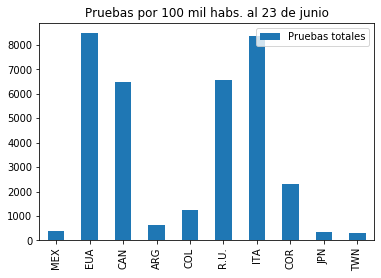

In [8]:
#Pruebas totales

paises = ['MEX','USA','CAN','BRA','ARG','COL','GBR','FRA','ITA','DEU','KOR','JPN','CHN','TWN']
paisesl=['MEX','EUA','CAN','BRA','ARG','COL','R.U.','FRA','ITA','ALE','COR','JPN','CHN','TWN']

base_test=internacional[internacional['date']==datetime.datetime.strptime('2020-23-06','%Y-%d-%m')]

tests=pd.DataFrame(index = paisesl, columns=['Pruebas totales'])

for p in range(len(paises)):
    tst=base_test['total_tests_per_thousand'][base_test['iso_code']==paises[p]].values
    tests.loc[paisesl[p]]=tst[0]*100
    
tests=tests.dropna()

tests.plot.bar()
plt.title('Pruebas por 100 mil habs. al 23 de junio')
#plt.savefig(path2 + 'pruebas_internacional.png', bbox_inches='tight')
#plt.clf()

In [10]:
tests

,Pruebas totales
MEX,372.8
EUA,8476.6
CAN,6475.6
ARG,647.2
COL,1247.2
R.U.,6571.8
ITA,8358.7
COR,2289.4
JPN,335.8
TWN,317.6


In [32]:
df = pd.read_excel(path3 + 'letal.xlsx', names = ['ESTADOS','LET'])
df['LET']=df['LET']*100
df

,ESTADOS,LET
0,Aguascalientes,5.14
1,Baja California,20.25
2,Baja California Sur,5.03
3,Campeche,8.61
4,Coahuila,4.95
5,Colima,10.39
6,Chiapas,9.72
7,Chihuahua,19.32
8,Durango,10.43
9,Guanajuato,6.99


In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt 

#Definimos el mapa (queda como geoDataFrame) y el csv que utilizaremos

shapefile = path3+'mapa/Mexico_Polygon.shp' #https://www.igismap.com/download-mexico-shapefile-free-boundary-line-polygon/
#datafile = 'data/obesity.csv'

gdf = gpd.read_file(shapefile)[['id','name','geometry']] #[['geometry']]
gdf.columns = ['id', 'ESTADOS', 'geometry']

gdf.head()
#gdf.plot()   #(column='infected')
#plt.show()

,id,ESTADOS,geometry
0,2610002,Aguascalientes,"POLYGON ((-102.87418 21.85277, -102.87283 21.8..."
1,2589601,Baja California,"MULTIPOLYGON (((-118.36411 29.14631, -118.3648..."
2,2589611,Baja California Sur,"MULTIPOLYGON (((-112.07737 25.49453, -112.0771..."
3,2568834,Campeche,"MULTIPOLYGON (((-91.18573 18.95770, -91.18554 ..."
4,2556679,Chiapas,"MULTIPOLYGON (((-94.03396 16.02143, -94.03468 ..."


In [35]:
# Perform left merge to preserve every row in gdf.
merged = gdf.merge(df, left_on = 'ESTADOS', right_on = 'ESTADOS', how = 'right')
def_d_100 = merged
def_d_100
# Replace NaN values to string 'No data'.
#merged.fillna('No data', inplace = True)

,id,ESTADOS,geometry,LET
0,2610002,Aguascalientes,"POLYGON ((-102.87418 21.85277, -102.87283 21.8...",5.14
1,2589601,Baja California,"MULTIPOLYGON (((-118.36411 29.14631, -118.3648...",20.25
2,2589611,Baja California Sur,"MULTIPOLYGON (((-112.07737 25.49453, -112.0771...",5.03
3,2568834,Campeche,"MULTIPOLYGON (((-91.18573 18.95770, -91.18554 ...",8.61
4,2556679,Chiapas,"MULTIPOLYGON (((-94.03396 16.02143, -94.03468 ...",9.72
5,1673425,Chihuahua,"POLYGON ((-109.07498 28.27249, -109.07087 28.2...",19.32
6,1661524,Coahuila,"POLYGON ((-103.96000 27.83531, -103.94578 27.8...",4.95
7,2340912,Colima,"MULTIPOLYGON (((-114.76002 18.34604, -114.7595...",10.39
8,2399740,Durango,"POLYGON ((-107.21013 25.41710, -107.18487 25.4...",10.43
9,2340909,Guanajuato,"POLYGON ((-102.09728 20.38649, -102.09713 20.3...",6.99


Text(0.5, 1, 'Letalidad')

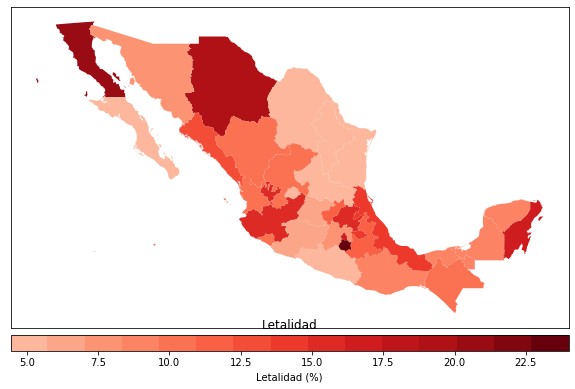

In [42]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
# import mapclassify 

fig, ax = fig, ax = plt.subplots(figsize = (10,10))
divider = make_axes_locatable(ax)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

import matplotlib as mpl

cmap = mpl.cm.Reds(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[5:,:-1])

# Barra horizontal 

cax = divider.append_axes('bottom', size = '5%', pad = 0.1)

def_d_100.plot(column = 'LET', ax = ax, cax = cax, cmap = cmap, legend = True, legend_kwds={'label': 'Letalidad (%)', 'orientation':'horizontal'})
plt.savefig(path2+'mapa_letalidad.png',bbox_inches='tight')

In [48]:
corte_string = datetime.datetime.strftime(corte,'%d-%m-%Y')

document = Document()
document.add_heading('Letalidad y Pruebas Positivas al ' + datetime.datetime.today().strftime('%d/%m/%Y'),0)


document.add_heading('Pruebas', level=1)

document.add_paragraph('En la última semana, en las redes sociales se mencionó que el porcentaje de pruebas positivas en México era sumamente elevado, lo cual decidimos comprobar y resultó ser cierto. Esto se puede deber a la baja cantidad de pruebas realizadas, por lo que no es fácil leer ese porcentaje. Los datos sobre las pruebas se ordenaron de acuerdo con el día de ingreso a la Unidad Médica')
 
document.add_picture(path2+'pruebas_internacional.png',width=Inches(3.6))
#document.save(path2 + 'Letalidad y Pruebas ' + string + '.docx')

document.add_paragraph('R.U. = Reino Unido')

document.add_picture(path2+'pruebas_pct.png',width=Inches(3.6))
#document.save(path2 + 'Letalidad y Pruebas ' + string + '.docx')

document.add_picture(path2+'pruebas_pos_neg.png', width=Inches(3.6))
#document.save(path2 + 'Letalidad y Pruebas ' + string + '.docx')


document.add_heading('Letalidad', level=1)

document.add_paragraph('Los datos sobre letalidad se ordenaron de acuerdo con el día en que se presentaron los síntomas, calculando la letalidad como el número de pacientes fallecidos con COVID19 dividido entre el total de los pacientes fallecidos con COVID19 más los pacientes no fallecidos con COVID19. La letalidad en México es alta, de poco más del 12%, lo cual se puede deber a que se realizan pocas pruebas. A su vez, la letalidad es altamente variable entre los estados.')

document.add_picture(path2 + 'letalidad_internacional.png', width=Inches(3.6))

document.add_paragraph('R.U. = Reino Unido')
                       
document.add_picture(path2+'letalidad.png', width=Inches(3.6))

document.add_picture(path2 + 'mapa_letalidad.png', width=Inches(4.2))

document.add_page_break()

table = document.add_table(34,2,style='LightShading-Accent1')

hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'ENTIDAD FEDERATIVA'
hdr_cells[1].text = 'LETALIDAD ACUMULADA AL ' + corte_string

                     
for i in x: 
    table.cell(i, 0).text = estados2['ENTIDAD_FEDERATIVA'][i]
    document.save(path2 + 'Letalidad y Pruebas ' + string + '.docx')    

table.cell(-1,0).text = 'VALLE DE MÉXICO'
document.save(path2 + 'Letalidad y Pruebas ' + string + '.docx')

for i in x: 
    table.cell(i,1).text = '{:6.2f}'.format(letal2[i].iloc[-13,-1])+'%'
    document.save(path2 + 'Letalidad y Pruebas ' + string + '.docx')
    
table.cell(-1,1).text = '{:6.2f}'.format(let_val2[-13])+'%'
document.save(path2 + 'Letalidad y Pruebas ' + string + '.docx')

document.add_page_break()

for i in x:
    document.add_picture(path2 +'letalidad_'+ estados2['ENTIDAD_FEDERATIVA'][i] +'.png', width=Inches(3.6))
    document.save(path2 + 'Letalidad y Pruebas ' + string + '.docx')

document.add_picture(path2+'letalidad_VALLE.png', width=Inches(3.6))

      



print('FIN')

C:\ProgramData\Anaconda3\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


FIN


In [17]:
for i in x:
    print(estados2['ENTIDAD_FEDERATIVA'][i])
    print(letal2[i].describe())

AGUASCALIENTES
                0
count  157.000000
mean     1.158819
std      1.634760
min      0.000000
25%      0.000000
50%      0.000000
75%      2.036872
max      5.333484
BAJA CALIFORNIA
                0
count  154.000000
mean     7.883896
std      8.464243
min      0.000000
25%      0.000000
50%      4.187207
75%     17.045474
max     21.304715
BAJA CALIFORNIA SUR
               0
count  98.000000
mean    2.196036
std     1.293345
min     0.000000
25%     1.049044
50%     2.316648
75%     3.164583
max     5.024687
CAMPECHE
               0
count  99.000000
mean    6.220254
std     4.340119
min     0.000000
25%     1.513137
50%     8.538068
75%     9.754466
max    11.460814
COAHUILA DE ZARAGOZA
                0
count  143.000000
mean     2.979346
std      2.766088
min      0.000000
25%      0.000000
50%      3.689053
75%      5.128420
max      8.877565
COLIMA
               0
count  99.000000
mean    3.319219
std     3.609743
min     0.000000
25%     0.000000
50%     1.705757
7

In [18]:
for i in x:
    print(estados2['ENTIDAD_FEDERATIVA'][i])
    print(pct2[i].describe())

AGUASCALIENTES
                0
count  162.000000
mean    16.003841
std     17.581010
min      0.000000
25%      0.000000
50%     11.073749
75%     21.833740
max     77.126758
BAJA CALIFORNIA
                0
count  168.000000
mean    35.192226
std     31.948889
min      0.000000
25%      0.000000
50%     39.883163
75%     65.697952
max     78.190483
BAJA CALIFORNIA SUR
                0
count  162.000000
mean    18.804386
std     16.915230
min      0.000000
25%      0.000000
50%     24.908459
75%     34.121967
max     44.313368
CAMPECHE
                0
count  120.000000
mean    32.913092
std     19.856866
min      0.000000
25%     14.285714
50%     40.351132
75%     50.026979
max     60.045631
COAHUILA DE ZARAGOZA
                0
count  169.000000
mean    11.571091
std     10.186212
min      0.000000
25%      0.000000
50%     12.735270
75%     17.851089
max     42.875479
COLIMA
                0
count  111.000000
mean    24.957853
std     17.786245
min      0.000000
25%      8.0

In [ ]:
pos={}
pos2={}
total={}
total2={}
pct={}
pct2={}

for i in x:
    pos[i]=base_positivo[base_positivo['ENTIDAD_UM']==i] #de la base de positivos por covid, selecciona las del estado i
    pos2[i]=pos[i].pivot_table(index=['FECHA_INGRESO'], aggfunc='size') #contamos las muertes por dia por covid del estado i
    total[i]=base_prueba[base_prueba['ENTIDAD_UM']==i] #de la base de muertes con prueba, selecciona las del edo i
    total2[i]=total[i].pivot_table(index=['FECHA_INGRESO'], aggfunc='size') #contamos las muertes por dia del estado i
    pct[i]=pos2[i]/total2[i] #letalidad como muerte 1/ muertes 1 y 2
    pct[i]=pd.DataFrame(pct[i]) #lo anterior como df
    idx=pd.date_range(pct[i].index[0],hoy) #crea un rango de fechas, desde el primero con muertes hasta hoy
    pct[i]=pct[i].reindex(idx, fill_value=0) #reindexa para tener todas las fechas, las que faltaban valen 0
    pct[i]=pct[i].fillna(0) #quedaron algunas fechas con NA, cambiamos NA por 0
    pct2[i]= pct[i].iloc[:,0].rolling(window=7).mean()*100 #media movil 7 dias
    pct2[i]= pd.DataFrame(pct2[i])   #lo pasamos a df
    pct2[i].plot()
    plt.title('Pruebas positivas por día: ' + estados2['ENTIDAD_FEDERATIVA'][i])
    #plt.xlabel('Fecha')
    plt.ylabel('Porcentaje (%)')
    plt.legend(['Media móvil 7 días'])
    plt.xlim([datetime.datetime.strptime('2020-26-03','%Y-%d-%m'),hoy])
    plt.axvspan(corte,hoy,color='r',alpha=0.2)
    plt.text(corte,np.min(pct2[i]),'En proceso de reporte',fontsize=10,rotation=90)
    plt.savefig(path2 + 'pruebas_'+ estados2['ENTIDAD_FEDERATIVA'][i] +'.png', bbox_inches='tight')
    plt.clf()
 